In [1]:

import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

import matplotlib.pyplot as plt

2024-04-24 14:31:54.905373: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 14:31:54.905686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 14:31:55.082045: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:

  
# Creating Empty DataFrame and Storing it in variable df 
df = pd.DataFrame() 
  
# Printing Empty DataFrame 
print(df) 

df = pd.read_csv('/kaggle/input/fakereal-logo-detection-dataset/file_mapping.csv')

# df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

Empty DataFrame
Columns: []
Index: []


,Filename,Brand Name,Label,Tagline
0,output\Cowbell\000001.jpg,Cowbell,Genuine,sooo creamy sooo gooood
1,genLogoOutput\Rolex\000003.jpg,Rolex,Fake,antiophthalmic_factor crown for every accompli...
2,output\PlayStation\000005.jpg,PlayStation,Genuine,eNoS Lives.
3,output\YouTube\000004.jpg,YouTube,Genuine,Broadcast Yourself
4,genLogoOutput\Lays\000004.jpg,Lays,Fake,eNoS sprightliness .


In [3]:
label_encoder = preprocessing.LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])
df

,Filename,Brand Name,Label,Tagline
0,output\Cowbell\000001.jpg,Cowbell,1,sooo creamy sooo gooood
1,genLogoOutput\Rolex\000003.jpg,Rolex,0,antiophthalmic_factor crown for every accompli...
2,output\PlayStation\000005.jpg,PlayStation,1,eNoS Lives.
3,output\YouTube\000004.jpg,YouTube,1,Broadcast Yourself
4,genLogoOutput\Lays\000004.jpg,Lays,0,eNoS sprightliness .
...,...,...,...,...
820,output\Google\000002.jpg,Google,1,Don’t be Evil
821,output\Nescafe\000004.jpg,Nescafe,1,It all starts with a Nescafé
822,genLogoOutput\Lays\000003.jpg,Lays,0,eNoS life_sentence .
823,genLogoOutput\Gillette\scal_000002.jpg,Gillette,0,The skillful deoxyadenosine_monophosphate huma...


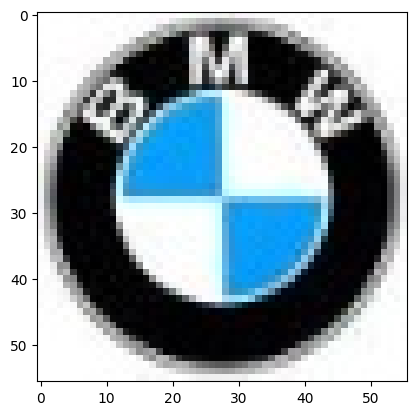

In [4]:
img_path = os.path.join('fakereal-logo-detection-dataset', df['Filename'][6].replace('000005', 'scal_000003'))
img = cv2.imread(r"/kaggle/input/fakereal-logo-detection-dataset/genLogoOutput/BMW/scal_000001.jpg")

# Convert color format if needed
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()

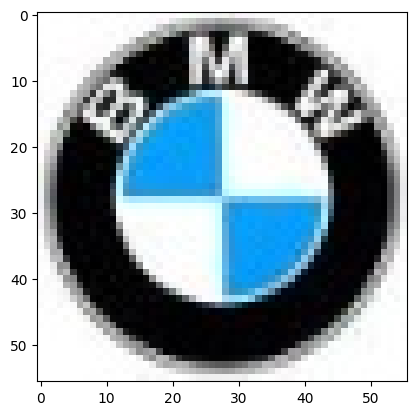

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Construct the image path using os.path.join
img_path = os.path.join('fakereal-logo-detection-dataset', df['Filename'][6].replace('000005', 'scal_000003'))

# Read the image using the constructed path
img = cv2.imread("/kaggle/input/fakereal-logo-detection-dataset/genLogoOutput/BMW/scal_000001.jpg")

# Check if the image was successfully loaded
if img is not None:
    # Convert color format if needed
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img)
    plt.show()
else:
    print("Error: Unable to load the image.")


In [6]:
!pip install opencv-python keras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [7]:
IMG_SIZE = 70
images = []
labels = []

for _, row in df.iterrows():
    img = cv2.imread(os.path.join('fakereal-logo-detection-dataset', df['Filename'][6].replace('000005', 'scal_000003')) )
    img = cv2.imread(r"/kaggle/input/fakereal-logo-detection-dataset/genLogoOutput/BMW/scal_000003.jpg")
    try:
        img_arr = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        image = img_to_array(img_arr)
        image = preprocess_input(image)
        images.append(image)
        labels.append(row['Label'])
    except:
        continue
image_shape = images[0].shape

for image in images:
    if image.shape != image_shape:
        raise ValueError("All images must have the same shape.")

images = np.array(images)
labels = np.array(labels)

[ WARN:0@38.284] global loadsave.cpp:248 findDecoder imread_('fakereal-logo-detection-dataset/output\Amazon\scal_000003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@38.299] global loadsave.cpp:248 findDecoder imread_('fakereal-logo-detection-dataset/output\Amazon\scal_000003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@38.302] global loadsave.cpp:248 findDecoder imread_('fakereal-logo-detection-dataset/output\Amazon\scal_000003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@38.305] global loadsave.cpp:248 findDecoder imread_('fakereal-logo-detection-dataset/output\Amazon\scal_000003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@38.308] global loadsave.cpp:248 findDecoder imread_('fakereal-logo-detection-dataset/output\Amazon\scal_000003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@38.310] global loadsave.cpp:248 findDecoder imread_('fakereal-logo-detection-dataset/output\Amazon\scal_000003.jpg')

In [8]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
test_labels

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [9]:
base_model = tf.keras.applications.MobileNet(include_top=False, weights='imagenet')
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

/tmp/ipykernel_18/2010734232.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNet(include_top=False, weights='imagenet')


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,360,193 (12.82 MB)

 Trainable params: 3,338,305 (12.73 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [11]:
# Train the model
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5, verbose=1,
    mode="auto",
    baseline=None, restore_best_weights=True,
)
model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels), callbacks=[m_loss])

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 535ms/step - accuracy: 0.6580 - loss: 0.6532 - val_accuracy: 0.6242 - val_loss: 0.7390
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 480ms/step - accuracy: 0.6966 - loss: 0.6511 - val_accuracy: 0.6242 - val_loss: 0.7409
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 473ms/step - accuracy: 0.5982 - loss: 0.6775 - val_accuracy: 0.6242 - val_loss: 0.6724
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 495ms/step - accuracy: 0.6711 - loss: 0.6539 - val_accuracy: 0.3758 - val_loss: 0.7901
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.7034 - loss: 0.6186 - val_accuracy: 0.3758 - val_loss: 1.1567
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 500ms/step - accuracy: 0.6681 - loss: 0.6491 - val_accuracy: 0.3758 - val_loss: 0.8253
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 470ms/step - accuracy: 0.6799 - loss: 0.6199 - val_accuracy: 0.6242 - val_loss: 0.6878
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 469ms/step - accuracy: 0.7007 - loss: 0.6529 - val_accu

In [12]:
_, accuracy = model.evaluate(test_images, test_labels)
print('Test Accuracy:', accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5967 - loss: 0.6947
Test Accuracy: 0.6242424249649048


In [13]:
y_pred = np.argmax(model.predict(test_images), axis=-1)

print(classification_report(y_pred, test_labels))

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       165
           1       0.00      0.00      0.00         0

    accuracy                           0.62       165
   macro avg       0.50      0.31      0.38       165
weighted avg       1.00      0.62      0.77       165



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
